### Two Intervals at Small x Expansion (First Order in x)

Note that in this case we can also fix $x$ while varying $\alpha$.

This is the free boson case.

Fix $\alpha=0.3$, $\epsilon^2=0.1$.

$x=0.001 \to 0.5$ with $\delta x=0.00005$

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_Firstx.csv', encoding='utf-8', encoding_errors='ignore')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,0.153053,0.150147,0.061986,0.037133,0.016928,0.008535,0.005106,0.003453,0.002519,0.001930,...,0.000081,0.000078,0.000074,0.000071,0.000068,0.000065,0.000062,0.000060,0.000058,0.000055
1,0.168254,0.165077,0.071997,0.038466,0.017876,0.009132,0.005488,0.003718,0.002715,0.002082,...,0.000088,0.000084,0.000081,0.000077,0.000074,0.000071,0.000068,0.000065,0.000063,0.000060
2,0.182733,0.179290,0.081425,0.039784,0.018782,0.009708,0.005858,0.003974,0.002905,0.002229,...,0.000095,0.000091,0.000087,0.000083,0.000080,0.000076,0.000073,0.000070,0.000068,0.000065
3,0.196553,0.192848,0.090329,0.041085,0.019649,0.010265,0.006218,0.004223,0.003089,0.002372,...,0.000102,0.000098,0.000093,0.000089,0.000086,0.000082,0.000079,0.000076,0.000073,0.000070
4,0.209773,0.205809,0.098759,0.042367,0.020482,0.010803,0.006567,0.004466,0.003269,0.002512,...,0.000109,0.000104,0.000099,0.000095,0.000091,0.000087,0.000084,0.000081,0.000077,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.606970,1.492672,0.637095,0.226765,0.120389,0.078377,0.057350,0.044863,0.036481,0.030376,...,0.002175,0.002090,0.002011,0.001936,0.001865,0.001799,0.001736,0.001677,0.001621,0.001568
9996,1.606957,1.492659,0.637091,0.226762,0.120387,0.078376,0.057349,0.044863,0.036480,0.030376,...,0.002175,0.002090,0.002011,0.001936,0.001865,0.001799,0.001736,0.001677,0.001621,0.001568
9997,1.606943,1.492646,0.637086,0.226759,0.120385,0.078375,0.057348,0.044862,0.036480,0.030376,...,0.002175,0.002090,0.002011,0.001936,0.001865,0.001799,0.001736,0.001677,0.001621,0.001568
9998,1.606929,1.492633,0.637082,0.226757,0.120384,0.078374,0.057348,0.044862,0.036480,0.030376,...,0.002175,0.002090,0.002011,0.001936,0.001865,0.001799,0.001736,0.001677,0.001621,0.001568


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


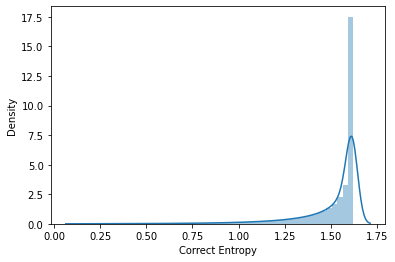

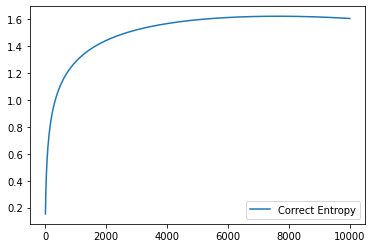

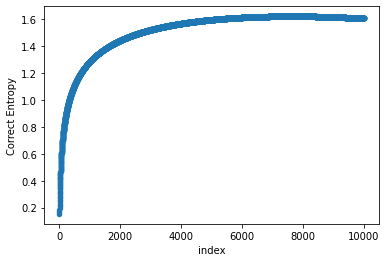

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="SmallxFirstTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 02s]
val_loss: 1.9161077034368645e-05

Best val_loss So Far: 1.7835280232247896e-05
Total elapsed time: 00h 00m 37s
INFO:tensorflow:Oracle triggered exit


In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 499us/step - loss: 0.8875 - mae: 0.8406
Epoch 2/60
282/282 [==============================] - 0s 440us/step - loss: 0.0078 - mae: 0.0597
Epoch 3/60
282/282 [==============================] - 0s 447us/step - loss: 0.0027 - mae: 0.0335
Epoch 4/60
282/282 [==============================] - 0s 440us/step - loss: 3.4688e-04 - mae: 0.0116
Epoch 5/60
282/282 [==============================] - 0s 433us/step - loss: 2.3916e-05 - mae: 0.0042
Epoch 6/60
282/282 [==============================] - 0s 447us/step - loss: 2.2431e-05 - mae: 0.0044
Epoch 7/60
282/282 [==============================] - 0s 444us/step - loss: 2.1900e-05 - mae: 0.0042
Epoch 8/60
282/282 [==============================] - 0s 447us/step - loss: 2.2065e-05 - mae: 0.0043
Epoch 9/60
282/282 [==============================] - 0s 444us/step - loss: 2.1927e-05 - mae: 0.0043
Epoch 10/60
282/282 [==============================] - 0s 451us/step - loss: 2.1708e-05 - mae: 0.0042
E

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


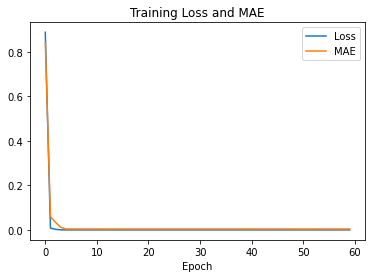

     Correct Entropy  Model Predictions
0           1.617062           1.620929
1           1.590116           1.595880
2           1.413182           1.418530
3           1.591590           1.597346
4           1.585735           1.591520
..               ...                ...
995         1.566221           1.572073
996         1.620583           1.623849
997         1.533545           1.539423
998         1.437702           1.443217
999         1.623558           1.626095

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


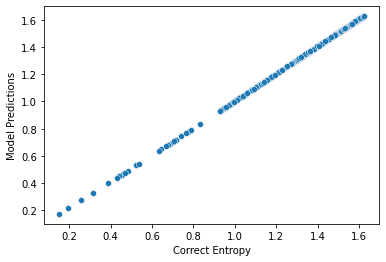

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.617062           1.620929             1.506234
1           1.590116           1.595880             1.485256
2           1.413182           1.418530             1.335194
3           1.591590           1.597346             1.486444
4           1.585735           1.591520             1.481714
..               ...                ...                  ...
995         1.566221           1.572073             1.465734
996         1.620583           1.623849             1.508665
997         1.533545           1.539423             1.438482
998         1.437702           1.443217             1.356512
999         1.623558           1.626095             1.509844

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.003867              0.110828
1               0.005764              0.104860
2               0.005348              0.077989
3               0.005756              0.105147
4       

In [9]:
best_models = tuner.get_best_models(top_n)
best_models

In [10]:
model = best_models[2] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 472us/step - loss: 2.8711e-05 - mae: 0.0045
Epoch 2/10
282/282 [==============================] - 0s 433us/step - loss: 2.6506e-05 - mae: 0.0044
Epoch 3/10
282/282 [==============================] - 0s 440us/step - loss: 2.6513e-05 - mae: 0.0045
Epoch 4/10
282/282 [==============================] - 0s 433us/step - loss: 2.5524e-05 - mae: 0.0044
Epoch 5/10
282/282 [==============================] - 0s 433us/step - loss: 2.5617e-05 - mae: 0.0044
Epoch 6/10
282/282 [==============================] - 0s 447us/step - loss: 2.5369e-05 - mae: 0.0045
Epoch 7/10
282/282 [==============================] - 0s 468us/step - loss: 2.5091e-05 - mae: 0.0043
Epoch 8/10
282/282 [==============================] - 0s 458us/step - loss: 2.4817e-05 - mae: 0.0044
Epoch 9/10
282/282 [==============================] - 0s 451us/step - loss: 2.5685e-05 - mae: 0.0046
Epoch 10/10
282/282 [==============================] - 0s 447us/step - loss: 2.4440e-05 - m

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


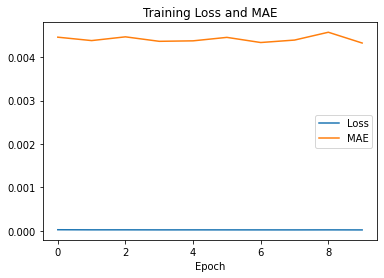

     Correct Entropy  Model Predictions
0           1.617062           1.618305
1           1.590116           1.592564
2           1.413182           1.416834
3           1.591590           1.593994
4           1.585735           1.588309
..               ...                ...
995         1.566221           1.569242
996         1.620583           1.621511
997         1.533545           1.537036
998         1.437702           1.441459
999         1.623558           1.623792

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


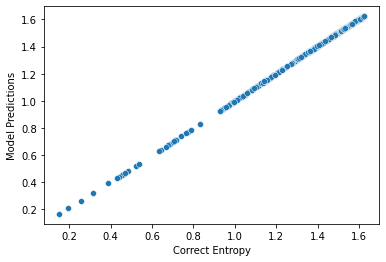

In [12]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [13]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.617062           1.618305             1.506234
1           1.590116           1.592564             1.485256
2           1.413182           1.416834             1.335194
3           1.591590           1.593994             1.486444
4           1.585735           1.588309             1.481714
..               ...                ...                  ...
995         1.566221           1.569242             1.465734
996         1.620583           1.621511             1.508665
997         1.533545           1.537036             1.438482
998         1.437702           1.441459             1.356512
999         1.623558           1.623792             1.509844

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.001243              0.110828
1               0.002448              0.104860
2               0.003652              0.077989
3               0.002404              0.105147
4       

### Reduce the dimensions of data (keep only k=10).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Two_Interval_Firstx.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

,1,2,3,4,5,6,7,8,9,10
0,0.061986,0.037133,0.016928,0.008535,0.005106,0.003453,0.002519,0.001930,0.001530,0.001245
1,0.071997,0.038466,0.017876,0.009132,0.005488,0.003718,0.002715,0.002082,0.001652,0.001346
2,0.081425,0.039784,0.018782,0.009708,0.005858,0.003974,0.002905,0.002229,0.001770,0.001443
3,0.090329,0.041085,0.019649,0.010265,0.006218,0.004223,0.003089,0.002372,0.001885,0.001537
4,0.098759,0.042367,0.020482,0.010803,0.006567,0.004466,0.003269,0.002512,0.001997,0.001630
...,...,...,...,...,...,...,...,...,...,...
9995,0.637095,0.226765,0.120389,0.078377,0.057350,0.044863,0.036481,0.030376,0.025700,0.022004
9996,0.637091,0.226762,0.120387,0.078376,0.057349,0.044863,0.036480,0.030376,0.025699,0.022004
9997,0.637086,0.226759,0.120385,0.078375,0.057348,0.044862,0.036480,0.030376,0.025699,0.022004
9998,0.637082,0.226757,0.120384,0.078374,0.057348,0.044862,0.036480,0.030376,0.025699,0.022004


In [2]:
X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="SmallxFirstTest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 03s]
val_loss: 0.0002624095795908943

Best val_loss So Far: 0.00023010314907878637
Total elapsed time: 00h 00m 42s
INFO:tensorflow:Oracle triggered exit


In [3]:
tuner.results_summary()

Results summary
Results in SmallxFirstTest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00023010314907878637
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00023837931803427637
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00023862600210122764
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0002560789871495217
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00025649395684013143
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00025661354447947815
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0002624095795908943
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00028943880170118064
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 0.00029820115014445037
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 0.00

In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 451us/step - loss: 0.2421 - mae: 0.2897
Epoch 2/60
282/282 [==============================] - 0s 444us/step - loss: 0.0028 - mae: 0.0388
Epoch 3/60
282/282 [==============================] - 0s 429us/step - loss: 6.7449e-04 - mae: 0.0209
Epoch 4/60
282/282 [==============================] - 0s 433us/step - loss: 3.8794e-04 - mae: 0.0158
Epoch 5/60
282/282 [==============================] - 0s 433us/step - loss: 3.4477e-04 - mae: 0.0146
Epoch 6/60
282/282 [==============================] - 0s 426us/step - loss: 3.1641e-04 - mae: 0.0138
Epoch 7/60
282/282 [==============================] - 0s 454us/step - loss: 3.0468e-04 - mae: 0.0135
Epoch 8/60
282/282 [==============================] - 0s 437us/step - loss: 2.8458e-04 - mae: 0.0130
Epoch 9/60
282/282 [==============================] - 0s 444us/step - loss: 2.6176e-04 - mae: 0.0125
Epoch 10/60
282/282 [==============================] - 0s 433us/step - loss: 2.4668e-04 - mae: 0.01

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


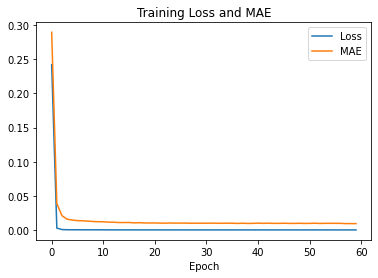

     Correct Entropy  Model Predictions
0           1.617062           1.627269
1           1.590116           1.603597
2           1.413182           1.421289
3           1.591590           1.604993
4           1.585735           1.599413
..               ...                ...
995         1.566221           1.580251
996         1.620583           1.629583
997         1.533545           1.546875
998         1.437702           1.447007
999         1.623558           1.629362

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


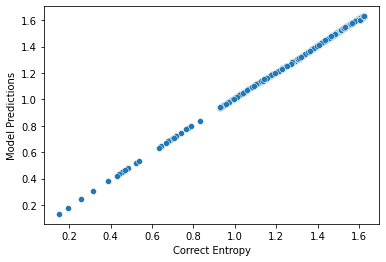

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           1.617062           1.627269             1.297008
1           1.590116           1.603597             1.284180
2           1.413182           1.421289             1.174374
3           1.591590           1.604993             1.284967
4           1.585735           1.599413             1.281812
..               ...                ...                  ...
995         1.566221           1.580251             1.270847
996         1.620583           1.629583             1.298007
997         1.533545           1.546875             1.251482
998         1.437702           1.447007             1.190630
999         1.623558           1.629362             1.296906

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.010207              0.320054
1               0.013481              0.305936
2               0.008107              0.238808
3               0.013403              0.306624
4       